**Nama**: Aida Muhdina

<b> **Email**: aidamuhdina@gmail.com </b>

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/Colab machine learning/Final Project/Dataset'

train_datagen = ImageDataGenerator(
                rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split = 0.4)
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split = 0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=9,
    shuffle=True,
    subset='training',
    class_mode='categorical')

val_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=9,
    shuffle=True,
    subset='validation',
    class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])

In [ ]:
#membuat kelas callback untuk menghentikan training
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy')>=0.96 and logs.get('val_accuracy')>=0.96:
      self.model.stop_training = True
      accuracy = float(logs.get('accuracy'))*100
      val_accuracy = float(logs.get('val_accuracy'))*100
      print("reached %.2f%% accuracy and %.2f%% val_accuracy" %(accuracy, val_accuracy))

callback = myCallback()

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=30,
    validation_data=val_generator,
    validation_steps=4,
    verbose=2,
    callbacks=[callback]
)

Epoch 1/30
25/25 - 83s - loss: 1.0999 - accuracy: 0.4044 - val_loss: 1.0703 - val_accuracy: 0.3611
Epoch 2/30
25/25 - 48s - loss: 0.9409 - accuracy: 0.6000 - val_loss: 0.7127 - val_accuracy: 0.7500
Epoch 3/30
25/25 - 38s - loss: 0.7377 - accuracy: 0.6756 - val_loss: 0.5588 - val_accuracy: 0.8333
Epoch 4/30
25/25 - 35s - loss: 0.4436 - accuracy: 0.8178 - val_loss: 0.6450 - val_accuracy: 0.6944
Epoch 5/30
25/25 - 33s - loss: 0.5391 - accuracy: 0.7644 - val_loss: 0.3569 - val_accuracy: 0.8611
Epoch 6/30
25/25 - 25s - loss: 0.4377 - accuracy: 0.8267 - val_loss: 0.2902 - val_accuracy: 0.9444
Epoch 7/30
25/25 - 22s - loss: 0.3619 - accuracy: 0.8756 - val_loss: 0.2494 - val_accuracy: 0.9167
Epoch 8/30
25/25 - 20s - loss: 0.2248 - accuracy: 0.9378 - val_loss: 0.1652 - val_accuracy: 0.9167
Epoch 9/30
25/25 - 16s - loss: 0.2449 - accuracy: 0.9022 - val_loss: 0.2159 - val_accuracy: 0.9167
Epoch 10/30
25/25 - 16s - loss: 0.2721 - accuracy: 0.9022 - val_loss: 0.1297 - val_accuracy: 0.9444
Epoch 11/

Saving S__22765579-removebg-preview.jpg to S__22765579-removebg-preview.jpg
S__22765579-removebg-preview.jpg
It's a ROCK


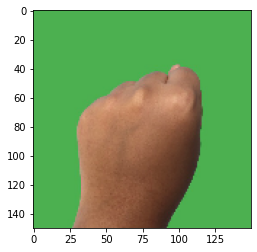

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  
  print(fn)
  if output_class==0:
    print("It's a PAPER")
  elif output_class==1:
    print("It's a ROCK")
  else:
    print("It's a SCISSORS")